In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle 

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules")
from utils import eccentricity_from_Q


In [2]:
df_res_drif = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_drifter_ESPRA.pkl").copy()
df_res_sat = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_IMOS_ESPRA.pkl").copy()
df_res_num = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_copernicus_ESPRA.pkl").copy()
df_res_sadcp = pd.read_pickle("/srv/scratch/z5297792/ESP_Paper_Data/df_res_sadcp_ESPRA.pkl").copy()


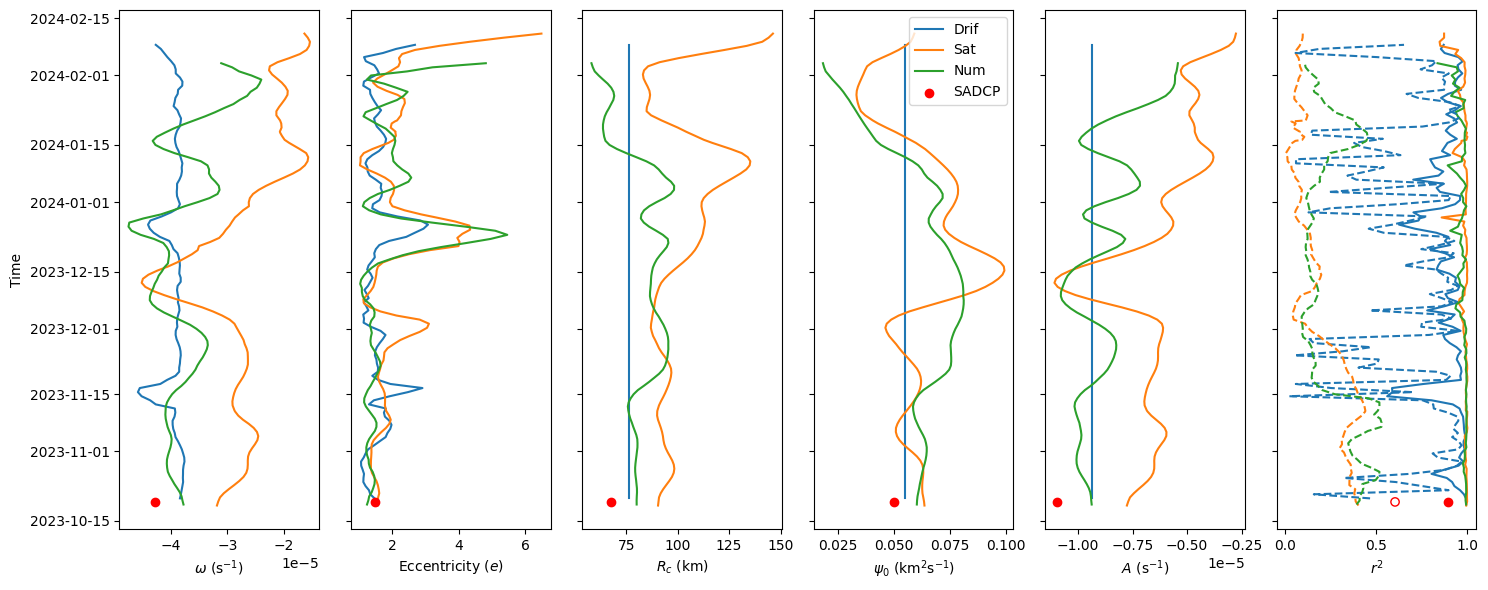

In [3]:
sadcp_data = df_res_sadcp.iloc[0]
colors = plt.get_cmap('tab10').colors

fig, axs = plt.subplots(1, 6, figsize=(15,6), sharey=True)
alpha = .4

axs[0].plot(df_res_drif.sw, df_res_drif.Time, color=colors[0])
axs[0].plot(df_res_sat.sw, df_res_sat.Time, color=colors[1])
axs[0].plot(df_res_num.sw, df_res_num.Time, color=colors[2])
axs[0].scatter(sadcp_data.sw, sadcp_data.Time_mean, color='r', zorder=5)
axs[0].set_xlabel(r'$\omega$ (s$^{-1}$)')

axs[1].plot(df_res_drif.e, df_res_drif.Time, color=colors[0])
axs[1].plot(df_res_sat.e,  df_res_sat.Time,  color=colors[1])
axs[1].plot(df_res_num.e,  df_res_num.Time,  color=colors[2])
axs[1].scatter(sadcp_data.e, sadcp_data.Time_mean, color='r', zorder=5)
axs[1].set_xlabel(r'Eccentricity ($e$)') #0 circular

axs[2].plot(df_res_drif.sRc/1e3, df_res_drif.Time, color=colors[0])
axs[2].plot(df_res_sat.sRc/1e3, df_res_sat.Time, color=colors[1])
axs[2].plot(df_res_num.sRc/1e3, df_res_num.Time, color=colors[2])
axs[2].scatter(sadcp_data.sRc/1e3, sadcp_data.Time_mean, color='r', zorder=5)
axs[2].set_xlabel(r'$R_c$ (km)')

axs[3].plot(df_res_drif.spsi0/1e6, df_res_drif.Time, color=colors[0], label='Drif')
axs[3].plot(df_res_sat.spsi0/1e6, df_res_sat.Time, color=colors[1], label='Sat')
axs[3].plot(df_res_num.spsi0/1e6, df_res_num.Time, color=colors[2], label='Num')
axs[3].scatter(sadcp_data.spsi0/1e6, sadcp_data.Time_mean, color='r', zorder=5, label='SADCP')
axs[3].set_xlabel(r'$\psi_0$ (km$^2$s$^{-1}$)'); axs[3].legend(loc='upper right')

axs[4].plot(df_res_drif.sA, df_res_drif.Time, color=colors[0])
axs[4].plot(df_res_sat.sA, df_res_sat.Time, color=colors[1])
axs[4].plot(df_res_num.sA, df_res_num.Time, color=colors[2])
axs[4].scatter(sadcp_data.sA, sadcp_data.Time_mean, color='r', zorder=5)
axs[4].set_xlabel(r'$A$ (s$^{-1}$)')

axs[5].plot(df_res_drif.r2_1, df_res_drif.Time, color=colors[0])
axs[5].plot(df_res_sat.r2_1, df_res_sat.Time, color=colors[1])
axs[5].plot(df_res_num.r2_1, df_res_num.Time, color=colors[2])
axs[5].scatter(sadcp_data.r2_1, sadcp_data.Time_mean, color='r', zorder=5)
axs[5].plot(df_res_drif.r2_2, df_res_drif.Time, color=colors[0], ls='--')
axs[5].plot(df_res_sat.r2_2, df_res_sat.Time, color=colors[1], ls='--')
axs[5].plot(df_res_num.r2_2, df_res_num.Time, color=colors[2], ls='--')
axs[5].scatter(sadcp_data.r2_2, sadcp_data.Time_mean, color='r', zorder=5, facecolors='none')
axs[5].set_xlabel(r'$r^2$')

# for ax in axs:
#     ax.grid(True)
axs[0].set_ylabel('Time')

plt.tight_layout()


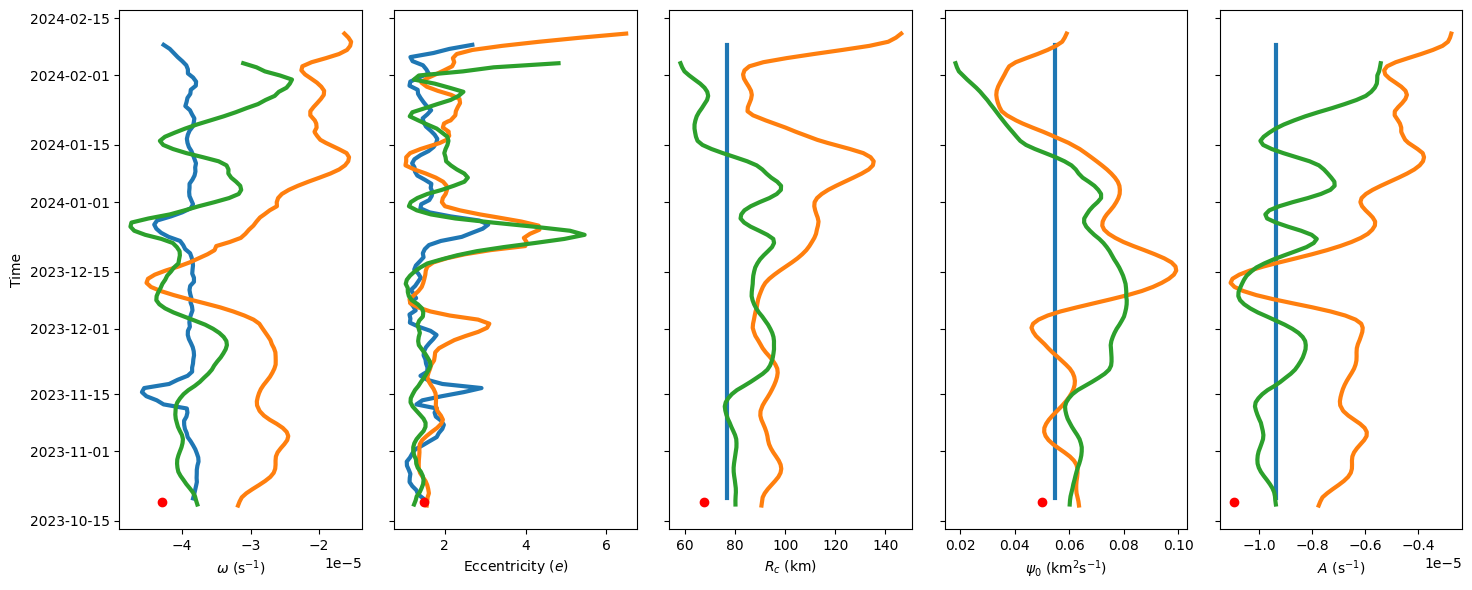

In [4]:
sadcp_data = df_res_sadcp.iloc[0]
colors = plt.get_cmap('tab10').colors

fig, axs = plt.subplots(1, 5, figsize=(15,6), sharey=True)
alpha = .4
lw = 3

axs[0].plot(df_res_drif.sw, df_res_drif.Time, color=colors[0], lw=lw)
axs[0].plot(df_res_sat.sw, df_res_sat.Time, color=colors[1], lw=lw)
axs[0].plot(df_res_num.sw, df_res_num.Time, color=colors[2], lw=lw)
axs[0].scatter(sadcp_data.sw, sadcp_data.Time_mean, color='r', zorder=5)
axs[0].set_xlabel(r'$\omega$ (s$^{-1}$)')

axs[1].plot(df_res_drif.e, df_res_drif.Time, color=colors[0], lw=lw)
axs[1].plot(df_res_sat.e,  df_res_sat.Time,  color=colors[1], lw=lw)
axs[1].plot(df_res_num.e,  df_res_num.Time,  color=colors[2], lw=lw)
axs[1].scatter(sadcp_data.e, sadcp_data.Time_mean, color='r', zorder=5)
axs[1].set_xlabel(r'Eccentricity ($e$)') #0 circular

axs[2].plot(df_res_drif.sRc/1e3, df_res_drif.Time, color=colors[0], label='Drifter', lw=lw)
axs[2].plot(df_res_sat.sRc/1e3, df_res_sat.Time, color=colors[1], label='Satellite', lw=lw)
axs[2].plot(df_res_num.sRc/1e3, df_res_num.Time, color=colors[2], label='Numerical', lw=lw)
axs[2].scatter(sadcp_data.sRc/1e3, sadcp_data.Time_mean, color='r', zorder=5, label='S-ADCP')
axs[2].set_xlabel(r'$R_c$ (km)'); #axs[2].legend(loc='lower right')

axs[3].plot(df_res_drif.spsi0/1e6, df_res_drif.Time, color=colors[0], lw=lw)
axs[3].plot(df_res_sat.spsi0/1e6, df_res_sat.Time, color=colors[1], lw=lw)
axs[3].plot(df_res_num.spsi0/1e6, df_res_num.Time, color=colors[2], lw=lw)
axs[3].scatter(sadcp_data.spsi0/1e6, sadcp_data.Time_mean, color='r', zorder=5)
axs[3].set_xlabel(r'$\psi_0$ (km$^2$s$^{-1}$)'); 

axs[4].plot(df_res_drif.sA, df_res_drif.Time, color=colors[0], lw=lw)
axs[4].plot(df_res_sat.sA, df_res_sat.Time, color=colors[1], lw=lw)
axs[4].plot(df_res_num.sA, df_res_num.Time, color=colors[2], lw=lw)
axs[4].scatter(sadcp_data.sA, sadcp_data.Time_mean, color='r', zorder=5)
axs[4].set_xlabel(r'$A$ (s$^{-1}$)')

# for ax in axs:
#     ax.grid(True)
axs[0].set_ylabel('Time')

plt.tight_layout()

Text(0, 0.5, 'y (km)')

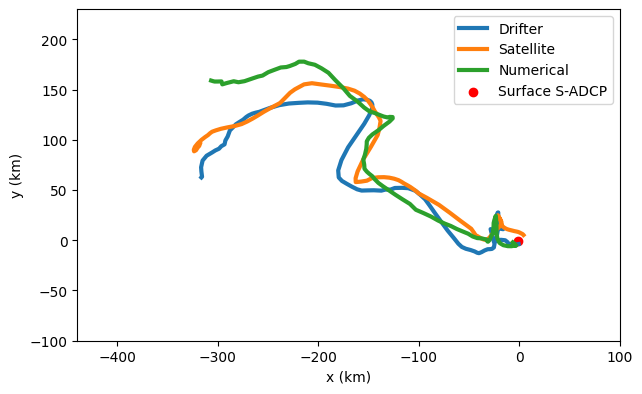

In [6]:
x = np.linspace(-350, 50, 501) * 1e3
y = np.linspace(-50, 200, 501) * 1e3
X, Y = np.meshgrid(x, y)

lw = 3
_, ax = plt.subplots(figsize=(7, 5))
ax.plot(df_res_drif.sxc/1e3, df_res_drif.syc/1e3, lw=lw, label='Drifter')
ax.plot(df_res_sat.sxc/1e3,  df_res_sat.syc/1e3, lw=lw,  label='Satellite')
ax.plot(df_res_num.sxc/1e3,  df_res_num.syc/1e3, lw=lw,  label='Numerical')
ax.scatter(sadcp_data.sxc/1e3, sadcp_data.syc/1e3, color='r', label='Surface S-ADCP')

ax.set_aspect('equal', adjustable='box'); ax.legend()
ax.set_xlim(-440, 100); ax.set_ylim(-100, 230)
ax.set_xlabel('x (km)'); ax.set_ylabel('y (km)')


Text(-0.06, 1.03, 'e)')

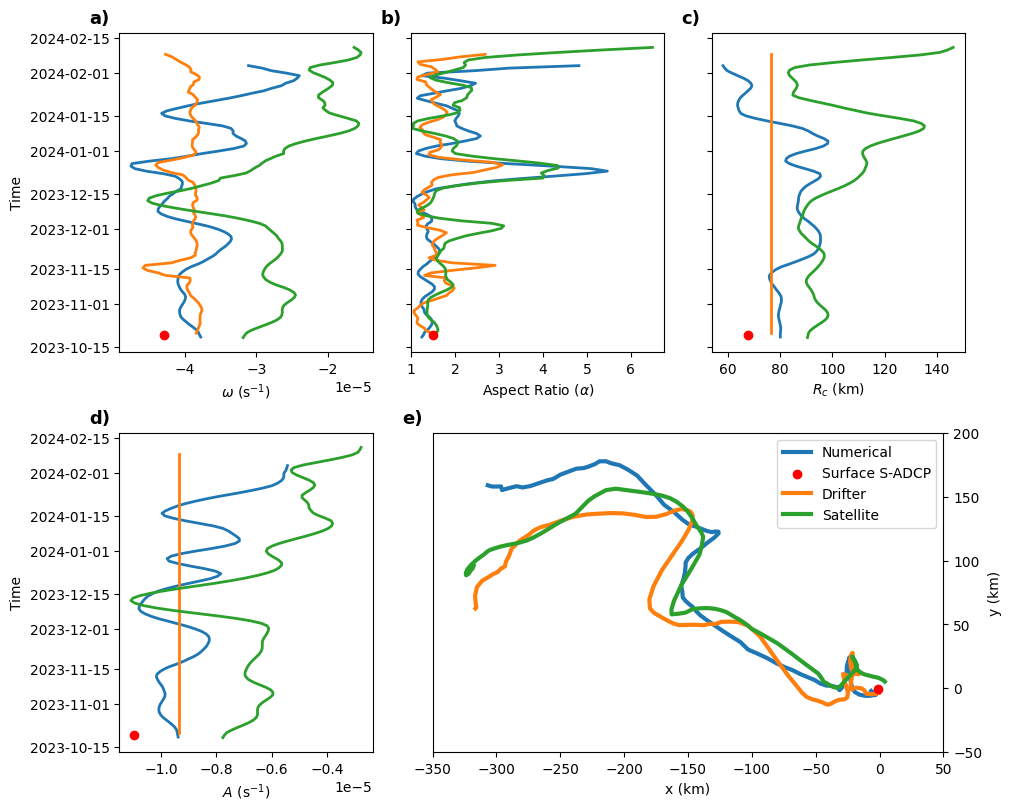

In [10]:
x = np.linspace(-350, 50, 501) * 1e3
y = np.linspace(-50, 200, 501) * 1e3
X, Y = np.meshgrid(x, y)

gs = plt.figure(figsize=(10,8), constrained_layout=True).add_gridspec(2, 3)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[0,2])
ax4 = plt.subplot(gs[1,0])
ax5 = plt.subplot(gs[1,1:3])
axs = [ax1, ax2, ax3, ax4, ax5]

alpha = .4
lw = 2
colors = plt.get_cmap('tab10').colors
sadcp_data = df_res_sadcp.iloc[0]

axs[0].plot(df_res_num.sw, df_res_num.Time, color=colors[0], lw=lw)
axs[0].plot(df_res_drif.sw, df_res_drif.Time, color=colors[1], lw=lw)
axs[0].plot(df_res_sat.sw, df_res_sat.Time, color=colors[2], lw=lw)
axs[0].scatter(sadcp_data.sw, sadcp_data.Time_mean, color='r', zorder=5)
axs[0].set_xlabel(r'$\omega$ (s$^{-1}$)'); axs[0].set_ylabel('Time')
axs[0].text(-0.12, 1.03, 'a)', transform=axs[0].transAxes, fontsize=13, fontweight='bold')

axs[1].plot(df_res_num.e,  df_res_num.Time,  color=colors[0], lw=lw)
axs[1].plot(df_res_drif.e, df_res_drif.Time, color=colors[1], lw=lw)
axs[1].plot(df_res_sat.e,  df_res_sat.Time,  color=colors[2], lw=lw)
axs[1].scatter(sadcp_data.e, sadcp_data.Time_mean, color='r', zorder=5)
axs[1].set_xlabel(r'Aspect Ratio ($\alpha$)'); axs[1].set_yticklabels([])
axs[1].text(-0.12, 1.03, 'b)', transform=axs[1].transAxes, fontsize=13, fontweight='bold')
axs[1].set_xlim(1,None)

axs[2].plot(df_res_num.sRc/1e3, df_res_num.Time, color=colors[0], lw=lw)
axs[2].plot(df_res_drif.sRc/1e3, df_res_drif.Time, color=colors[1], lw=lw)
axs[2].plot(df_res_sat.sRc/1e3, df_res_sat.Time, color=colors[2], lw=lw)
axs[2].scatter(sadcp_data.sRc/1e3, sadcp_data.Time_mean, color='r', zorder=5)
axs[2].set_xlabel(r'$R_c$ (km)'); axs[2].set_yticklabels([])
axs[2].text(-0.12, 1.03, 'c)', transform=axs[2].transAxes, fontsize=13, fontweight='bold')

axs[3].plot(df_res_num.sA, df_res_num.Time, color=colors[0], lw=lw)
axs[3].plot(df_res_drif.sA, df_res_drif.Time, color=colors[1], lw=lw)
axs[3].plot(df_res_sat.sA, df_res_sat.Time, color=colors[2], lw=lw)
axs[3].scatter(sadcp_data.sA, sadcp_data.Time_mean, color='r', zorder=5)
axs[3].set_xlabel(r'$A$ (s$^{-1}$)'); axs[3].set_ylabel('Time')
axs[3].text(-0.12, 1.03, 'd)', transform=axs[3].transAxes, fontsize=13, fontweight='bold')

lw = 3
axs[4].plot(df_res_num.sxc/1e3,  df_res_num.syc/1e3, color=colors[0], lw=lw, label='Numerical')
axs[4].scatter(sadcp_data.sxc/1e3, sadcp_data.syc/1e3, color='r', label='Surface S-ADCP', zorder=5)
axs[4].plot(df_res_drif.sxc/1e3, df_res_drif.syc/1e3, color=colors[1], lw=lw, label='Drifter')
axs[4].plot(df_res_sat.sxc/1e3,  df_res_sat.syc/1e3, color=colors[2], lw=lw, label='Satellite')
axs[4].set_aspect('equal', adjustable='box'); axs[4].legend()
axs[4].set_xlim(-350, 50); axs[4].set_ylim(-50, 200)
axs[4].set_xlabel('x (km)'); axs[4].set_ylabel('y (km)')
axs[4].yaxis.set_label_position("right")
axs[4].yaxis.tick_right()
axs[4].yaxis.set_ticks_position('right')
axs[4].text(-0.06, 1.03, 'e)', transform=axs[4].transAxes, fontsize=13, fontweight='bold')

